# 📊 ITviec Reviews - Sentiment Analysis & Clustering

## Project Overview
This notebook implements an end-to-end system to analyze employee reviews from ITviec:
1. **Sentiment Classification**: Classify reviews as positive, neutral, or negative
2. **Company Clustering**: Group companies based on review characteristics

---

## Table of Contents
1. [Basic Data Exploration](#basic-data-exploration)
2. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
3. [Data Preprocessing Pipeline](#data-preprocessing-pipeline)
4. [Model Development](#model-development)
5. [Clustering Analysis](#clustering-analysis)
6. [Dashboard Implementation](#dashboard-implementation)

---


# 1 · Basic Data Exploration
In this section we take a first look at the raw review data:
* quick shape / schema checks  
* missing-value inspection  
* a few sanity plots (label counts, review‐length distribution, top companies)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.options.mode.chained_assignment = None


In [3]:
# Load data
RAW_PATH = "/Users/ssyan110/Development/Graduation_project/project1/data/Reviews.xlsx"  
SHEET    = 0  

df = pd.read_excel(RAW_PATH, sheet_name=SHEET)
print(f"✅ Loaded {df.shape[0]:,} rows · {df.shape[1]} columns")
display(df.head())


✅ Loaded 8,417 rows · 13 columns


,id,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace,Recommend?
0,4,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,4,Yes
1,4,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,5,Yes
2,4,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,3,Yes
3,4,Accenture,February 2025,good environment for fresher,good env. for fresher to learn and improve the...,Need to forcus more on benefit and evaluate co...,3,2,2,3,4,4,No
4,4,Accenture,February 2023,"Môi trường làm việc thoải mái, vui vẻ","- Văn phòng đẹp, cơ sở vật chất tốt\n- Sếp và ...",- Phát triển văn phòng để rộng rãi hơn\n- Công...,4,3,4,4,4,3,Yes


In [4]:
# Quick schema + NA check
print("\nDataFrame info ⇣")
df.info()

print("\nMissing values per column ⇣")
na_series = df.isna().sum().sort_values(ascending=False)
display(na_series[na_series > 0])

display(df.describe(include="all").T.head(15))



DataFrame info ⇣
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8417 non-null   int64 
 1   Company Name                 8417 non-null   object
 2   Cmt_day                      8417 non-null   object
 3   Title                        8417 non-null   object
 4   What I liked                 8416 non-null   object
 5   Suggestions for improvement  8412 non-null   object
 6   Rating                       8417 non-null   int64 
 7   Salary & benefits            8417 non-null   int64 
 8   Training & learning          8417 non-null   int64 
 9   Management cares about me    8417 non-null   int64 
 10  Culture & fun                8417 non-null   int64 
 11  Office & workspace           8417 non-null   int64 
 12  Recommend?                   8417 non-null   object
dtypes: int64(7), ob

Suggestions for improvement    5
What I liked                   1
dtype: int64

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,8417.0,NaN,NaN,NaN,256.994178,114.732313,4.0,182.0,223.0,339.0,477.0
Company Name,8417,180,FPT Software,2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cmt_day,8417,107,July 2021,284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,8417,6951,Môi trường làm việc tốt,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What I liked,8416,8405,"Kiến thức trang bị đầy đủ hàng tháng, các job ...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suggestions for improvement,8412,7724,Đi làm ở công ty này lương cao quá. k xứng đán...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,8417.0,NaN,NaN,NaN,4.072116,0.97529,1.0,3.0,4.0,5.0,5.0
Salary & benefits,8417.0,NaN,NaN,NaN,3.733872,1.071243,1.0,3.0,4.0,5.0,5.0
Training & learning,8417.0,NaN,NaN,NaN,3.960912,0.99751,1.0,3.0,4.0,5.0,5.0
Management cares about me,8417.0,NaN,NaN,NaN,3.89046,1.091305,1.0,3.0,4.0,5.0,5.0


In [5]:
# Combine text columns into single review string
TEXT_COLS = ["Title", "What I liked", "Suggestions for improvement"]
df["review"] = (
    df[TEXT_COLS]
    .fillna("")
    .agg(" ".join, axis=1)
    .str.strip()
)

print("Sample combined review ↓")
display(df[["review"]].head(3))


Sample combined review ↓


,review
0,"Môi trường thoải mái, ít áp lực, có thể làm vi..."
1,Công ty trẻ trung năng động Cơ sở vật chất đẹp...
2,Môi trường làm việc thoải mái vui vẻ Mội người...


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_49091/1023658938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="viridis")


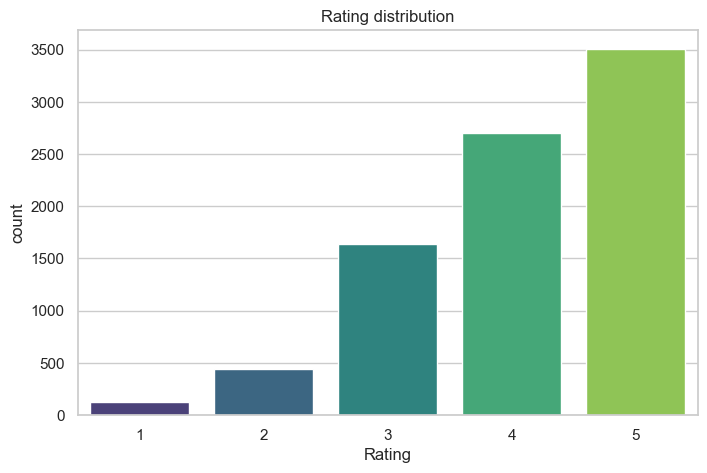

In [6]:
# Distribution of Rating (1-5 stars)
sns.countplot(x="Rating", data=df, palette="viridis")
plt.title("Rating distribution")
plt.show()



/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_49091/1182742839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=RECOMM_COL, data=df, order=order, palette="Set2")


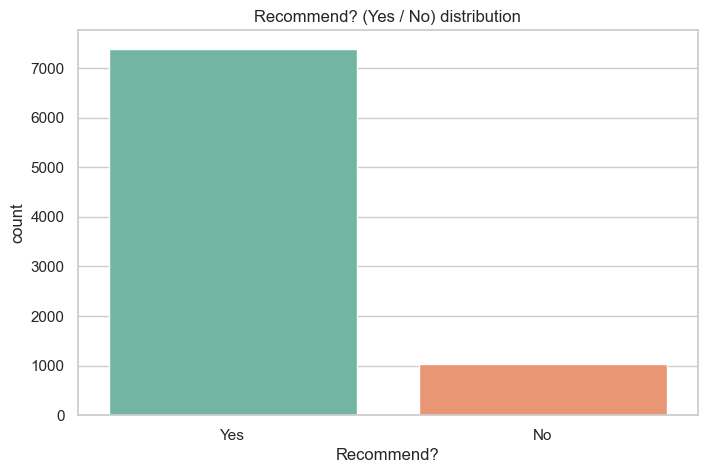

In [7]:
# Distribution of Recommend? (Yes / No)
RECOMM_COL = "Recommend?"
order = df[RECOMM_COL].value_counts().index
sns.countplot(x=RECOMM_COL, data=df, order=order, palette="Set2")
plt.title("Recommend? (Yes / No) distribution")
plt.show()


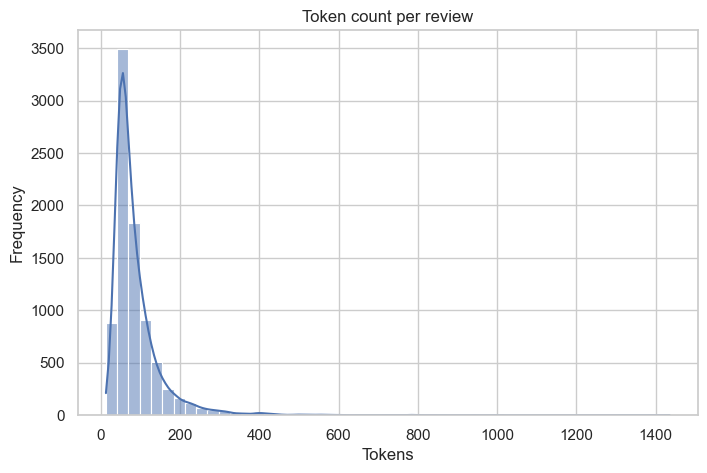

count    8417.000000
mean       87.751455
std        68.752897
min        13.000000
25%        51.000000
50%        68.000000
75%       101.000000
90%       152.400000
95%       203.000000
max      1435.000000
Name: token_cnt, dtype: float64


In [8]:
# Review length (token count)
df["token_cnt"] = df["review"].str.split().apply(len)
sns.histplot(df["token_cnt"], bins=50, kde=True)
plt.title("Token count per review")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()

print(df["token_cnt"].describe(percentiles=[.25, .5, .75, .9, .95]))


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_49091/3295392591.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


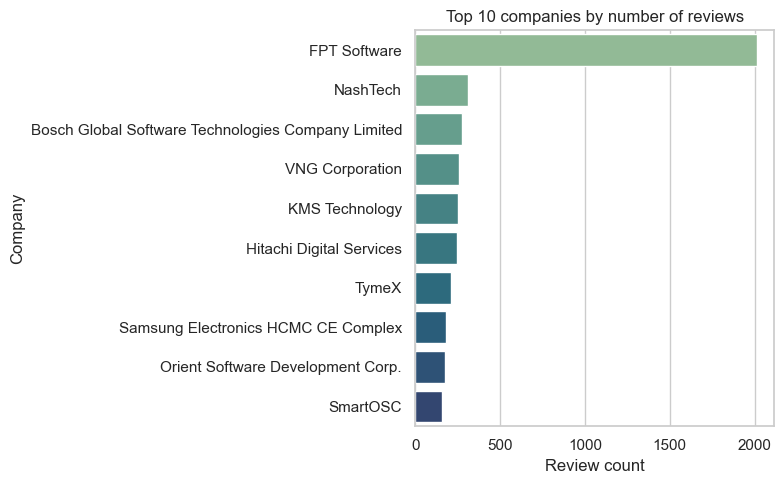

,Company Name,review_count
0,FPT Software,2014
1,NashTech,308
2,Bosch Global Software Technologies Company Lim...,278
3,VNG Corporation,259
4,KMS Technology,251
5,Hitachi Digital Services,249
6,TymeX,213
7,Samsung Electronics HCMC CE Complex,184
8,Orient Software Development Corp.,176
9,SmartOSC,158


In [9]:
# Top-10 companies by review count
top_companies = (
    df["Company Name"]
    .value_counts()
    .head(10)
    .rename_axis("Company Name")
    .reset_index(name="review_count")
)

# plot
sns.barplot(
    y="Company Name",
    x="review_count",
    data=top_companies,
    palette="crest"
)
# use len(top_companies) (10) or hard-code 10
plt.title(f"Top {len(top_companies)} companies by number of reviews")
plt.xlabel("Review count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

# display the DataFrame
display(top_companies)



In [10]:
# Duplicate check
no_of_duplicated_rows = df.duplicated().sum()
print(f"Found {no_of_duplicated_rows:,} full-row duplicates")


Found 0 full-row duplicates


In [11]:
# Save snapshot for faster reloads later
SNAPSHOT_PATH = "raw_snapshot.csv"
df.to_csv(SNAPSHOT_PATH, index=False)
print(f"Snapshot saved → {SNAPSHOT_PATH}")


Snapshot saved → raw_snapshot.csv


# 2 · Exploratory Data Analysis (EDA) <a id="exploratory-data-analysis"></a>

In [12]:
# Reload snapshot if notebook was restarted
df = pd.read_csv("raw_snapshot.csv")
print("Snapshot re-loaded:", df.shape)

Snapshot re-loaded: (8417, 15)


In [13]:
NUMERIC_SUBSCORES = [
    "Salary & benefits",
    "Training & learning",
    "Management cares about me",
    "Culture & fun",
    "Office & workspace",
]

Recommend?,No,Yes
Rating,,
1,122,2
2,407,39
3,411,1228
4,73,2625
5,14,3496


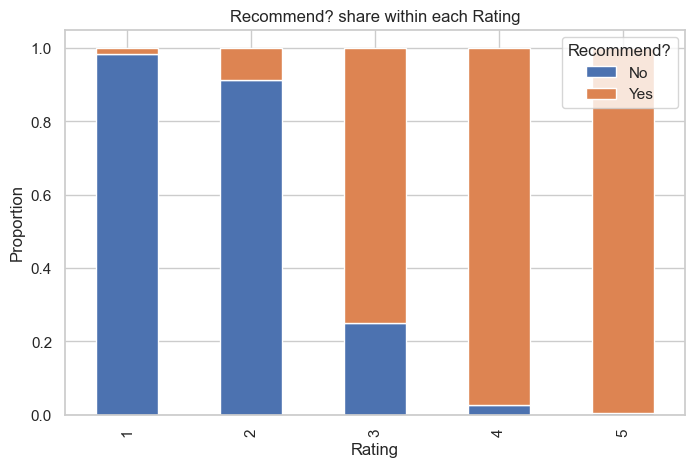

In [14]:
# Rating × Recommend
cross_tab = pd.crosstab(df["Rating"], df["Recommend?"])
display(cross_tab.style.background_gradient(cmap="YlGnBu"))

cross_tab_normalized = cross_tab.div(cross_tab.sum(1), axis=0)  
cross_tab_normalized.plot(kind="bar", stacked=True)
plt.title("Recommend? share within each Rating")
plt.ylabel("Proportion")
plt.legend(title="Recommend?", loc="upper right")
plt.show()


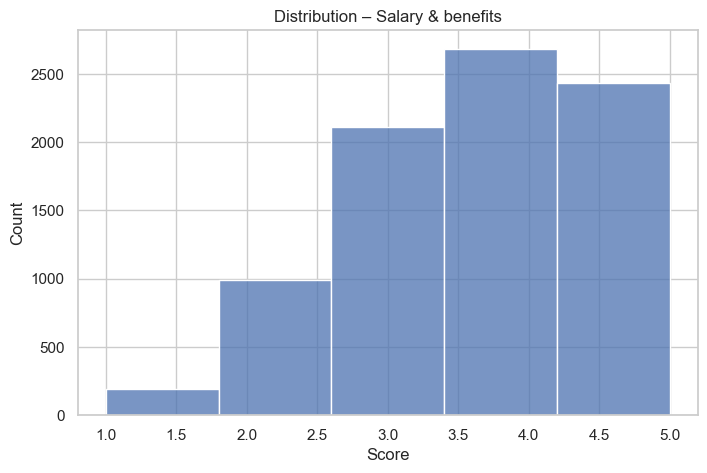

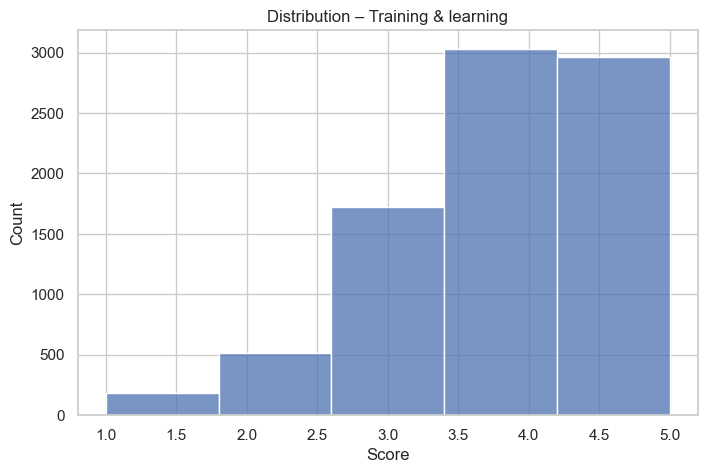

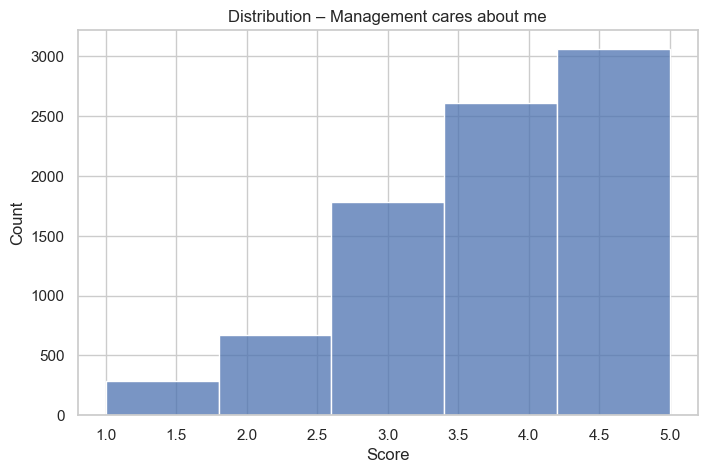

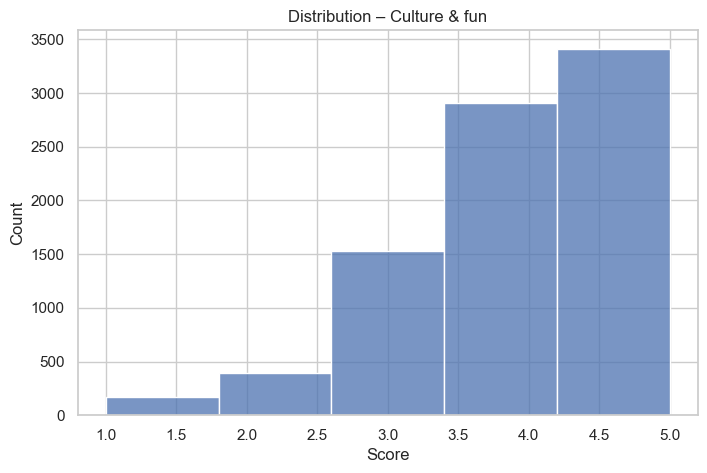

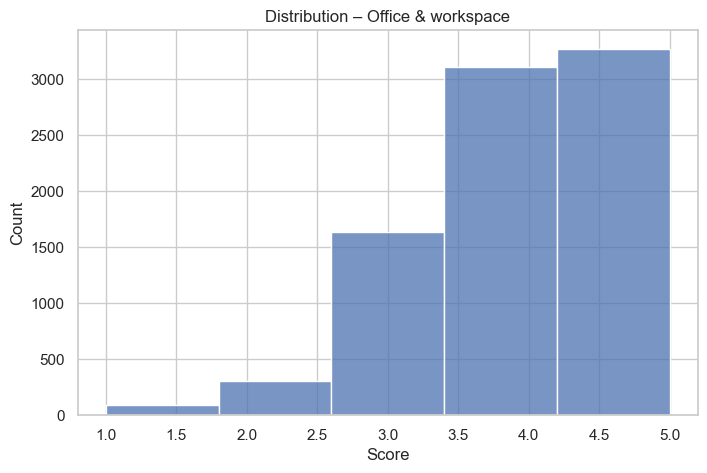

In [15]:
# Sub-score distributions
for col in NUMERIC_SUBSCORES:
    if col in df.columns:
        sns.histplot(df[col], bins=5, kde=False)
        plt.title(f"Distribution – {col}")
        plt.xlabel("Score")
        plt.ylabel("Count")
        plt.show()


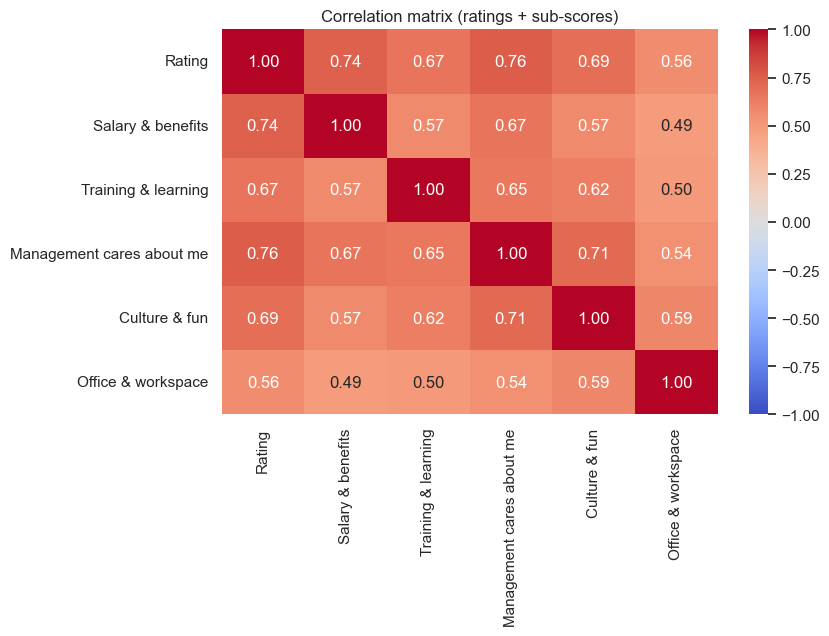

In [16]:
# Correlation heatmap (numeric cols)
sub_df = df[["Rating"] + NUMERIC_SUBSCORES].dropna()
correlation   = sub_df.corr()

sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation matrix (ratings + sub-scores)")
plt.show()


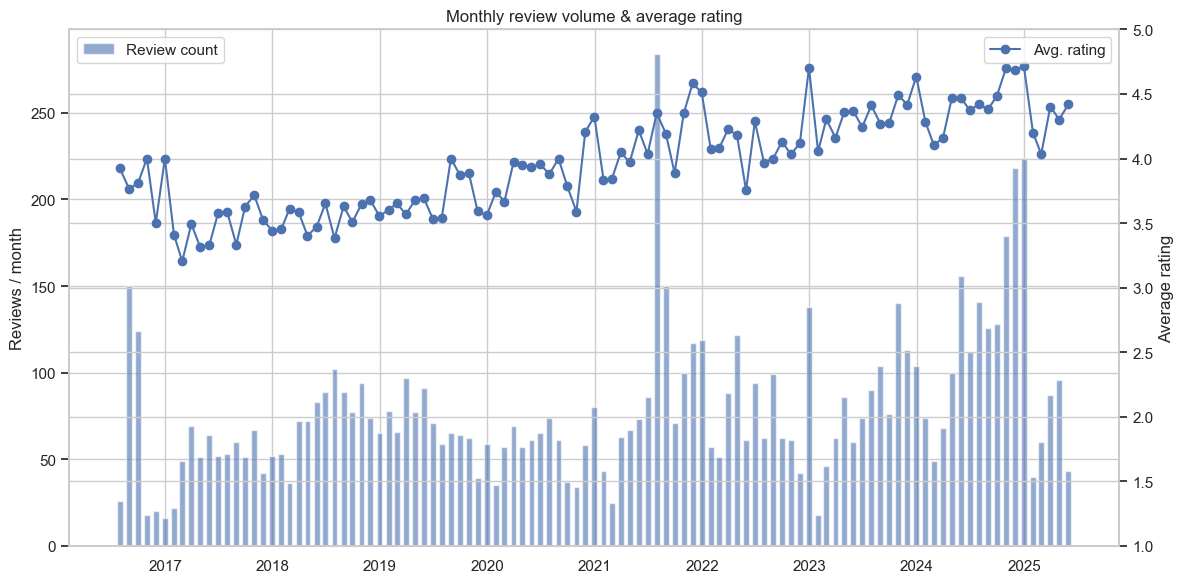

In [17]:
# Time-series: Monthly review count & avg. rating

# Convert Cmt_day to datetime
df["cmt_date"] = pd.to_datetime(df["Cmt_day"].dropna(), format="%B %Y", errors="coerce")

# Create time series data
time_series = (
    df.set_index("cmt_date")
    .resample("M")
    .agg(review_count=("review", "size"), avg_rating=("Rating", "mean"))
)

# Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(time_series.index, time_series["review_count"], width=20, alpha=.6, label="Review count")
ax1.set_ylabel("Reviews / month")
ax1.legend(loc="upper left")

ax2 = ax1.twinx() # share the same x-axis, but a separate y-axis
ax2.plot(time_series.index, time_series["avg_rating"], marker="o", linestyle="-", label="Avg. rating")
ax2.set_ylabel("Average rating")
ax2.set_ylim(1, 5)
ax2.legend(loc="upper right")

plt.title("Monthly review volume & average rating")
plt.tight_layout()
plt.show()

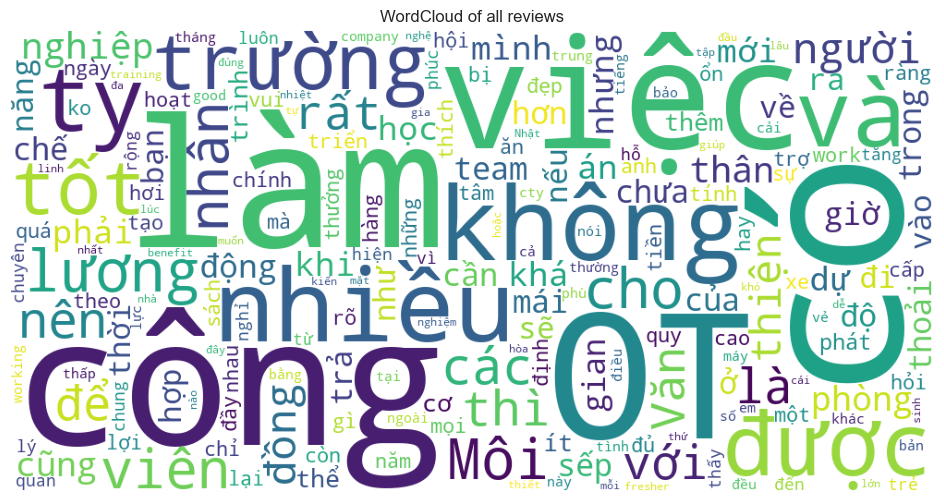

In [18]:
# Word cloud before preprocessing
from wordcloud import WordCloud
txt = " ".join(df["review"].astype(str))
wc = WordCloud(
    width=1000, height=500, background_color="white",
    max_words=200, collocations=False).generate(txt)
plt.figure(figsize=(12,6)); plt.imshow(wc); plt.axis("off")
plt.title("WordCloud of all reviews"); plt.show()

# 3 · Data Preprocessing Pipeline <a id="data-preprocessing-pipeline"></a>


In [19]:
# Setup & helper imports
import re
import unicodedata
from tqdm.auto import tqdm
from underthesea import word_tokenize

### Load preprocessing dictionaries and resources 


In [20]:
print("Loading preprocessing resources...")

data_path = "/Users/ssyan110/Development/Graduation_project/project1/data/"


def load_text_file(filename):
    with open(data_path + filename, 'r', encoding='utf-8') as f:
        return [line.strip() for line in f if line.strip()]

def load_dictionary_file(filename):
    d = {}
    with open(data_path + filename, 'r', encoding='utf-8') as f:
        for line in f:
            if line.strip():
                k, v = line.strip().split('\t', 1)
                d[k] = v
    return d

try:
    vietnamese_stopwords   = set(load_text_file("vietnamese-stopwords.txt"))
    wrong_word_set        = set(load_text_file("wrong-word.txt"))      # now just a list
    teencode_dict          = load_dictionary_file("teencode.txt")
    emojicon_dict          = load_dictionary_file("emojicon.txt")
    english_vnmese_dict    = load_dictionary_file("english-vnmese.txt")
    
    print("Resources loaded:")
    print(f" • stopwords: {len(vietnamese_stopwords):,}")
    print(f" • wrong-word list: {len(wrong_word_set):,}")
    print(f" • teencode dict: {len(teencode_dict):,}")
    print(f" • emoji dict: {len(emojicon_dict):,}")
    print(f" • Eng–VN dict: {len(english_vnmese_dict):,}")
    
except Exception as e:
    print("Error loading resources:", e)


Loading preprocessing resources...
Resources loaded:
 • stopwords: 1,950
 • wrong-word list: 11,842
 • teencode dict: 405
 • emoji dict: 45
 • Eng–VN dict: 4,177


### Pre-compile your regex patterns


In [21]:
def _build_regex(keys, whole_word=True, flags=0):
    pat = "|".join(map(re.escape, keys))
    if whole_word:
        return re.compile(rf"\b({pat})\b", flags=flags)
    else:
        return re.compile(pat, flags=flags)

EMOJI_RE      = _build_regex(emojicon_dict.keys(), whole_word=False)
TEEN_RE       = _build_regex(teencode_dict.keys())
ENG_RE        = _build_regex(english_vnmese_dict.keys(), flags=re.IGNORECASE)

# we no longer need WRONG_RE since we drop tokens post-tokenization
PUNCT_DIGIT_RE = re.compile(r"[^A-Za-zÀ-ỹà-ỹ0-9\s]")
MULTISPACE_RE  = re.compile(r"\s+")


### Define cleaning function


In [69]:
def clean_vn_review(text: str) -> str:
    """
    Full Vietnamese review cleaning pipeline:
      1. lowercase & unicode normalize
      2. replace emojis, teencode, English→VN
      3. strip punctuation/digits, collapse whitespace
      4. tokenise, drop stopwords & wrong-word tokens
    """
    if not isinstance(text, str):
        text = ""
    # 1. normalize
    txt = text.lower()
    txt = unicodedata.normalize("NFC", txt)
    
    # 2. dictionary replacements
    txt = EMOJI_RE.sub(lambda m: " " + emojicon_dict[m.group(0)] + " ", txt)
    txt = TEEN_RE.sub(lambda m: teencode_dict[m.group(0)], txt)
    txt = ENG_RE.sub(lambda m: english_vnmese_dict[m.group(0).lower()], txt)
    
    # 3. join "không" + follwing words to keep negation
    txt = re.sub(r"\bkhông\s+(?=(?:\w{2,}\s){0,3}\w{2,})", "không_", txt)
    
    # 4. remove punctuation/digits and collapse spaces
    txt = PUNCT_DIGIT_RE.sub(" ", txt)
    txt = MULTISPACE_RE.sub(" ", txt).strip()
    
    # 5. tokenise and filter
    tokens = word_tokenize(txt, format="text").split()
    filtered = [
        t for t in tokens
        if t not in vietnamese_stopwords
           and t not in wrong_word_set
           and len(t) > 1
    ]
    return " ".join(filtered)


### Apply cleaning function to all reviews


In [23]:
tqdm.pandas(desc="Cleaning reviews")
df["clean_review"] = df["review"].progress_apply(clean_vn_review)

Cleaning reviews:   0%|          | 0/8417 [00:00<?, ?it/s]

### Derive sentiment labels

In [24]:
def rating_to_sentiment(rating: float) -> str:
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["Rating"].apply(rating_to_sentiment)


### Check review and cleaned_review

In [25]:
# preview raw vs clean
display(df[["review", "clean_review"]].head())

,review,clean_review
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...
1,Công ty trẻ trung năng động Cơ sở vật chất đẹp...,công_ty trẻ trung_năng động_cơ_sở_vật_chất đẹp...
2,Môi trường làm việc thoải mái vui vẻ Mội người...,môi_trường làm_việc thoải_mái vui_vẻ mội thân_...
3,good environment for fresher good env. for fre...,tốt environment fresher tốt env fresher learn ...
4,"Môi trường làm việc thoải mái, vui vẻ - Văn ph...",môi_trường làm_việc thoải_mái vui_vẻ văn_phòng...


### Augment with positive/negative word & emoji

In [26]:
# Load positive/negative word & emoji lists
positive_words   = load_text_file("positive_VN.txt")
negative_words   = load_text_file("negative_VN.txt")
positive_emojis  = load_text_file("positive_emoji.txt")
negative_emojis  = load_text_file("negative_emoji.txt")

print(f"Loaded {len(positive_words)} positive words, {len(negative_words)} negative words")
print(f"Loaded {len(positive_emojis)} positive emojis, {len(negative_emojis)} negative emojis")


Loaded 47 positive words, 54 negative words
Loaded 51 positive emojis, 54 negative emojis


### Compute counts on the cleaned text

In [27]:
# Define function to count occurrences
def count_tokens(text: str, tokens: list[str]) -> tuple[int,list[str]]:
    text_lower = text.lower()
    total = 0
    found = []
    for tok in tokens:
        count = text_lower.count(tok)   
        if count:
            total += count
            found.append(tok)
    return total, found


In [28]:
df["positive_word_count"], df["positive_word_list"] = zip(
    *df["clean_review"].apply(lambda doc: count_tokens(doc, positive_words))
)
df["negative_word_count"], df["negative_word_list"] = zip(
    *df["clean_review"].apply(lambda doc: count_tokens(doc, negative_words))
)
df["positive_emoji_count"], df["positive_emoji_list"] = zip(
    *df["review"].apply(lambda doc: count_tokens(doc, positive_emojis))
)
df["negative_emoji_count"], df["negative_emoji_list"] = zip(
    *df["review"].apply(lambda doc: count_tokens(doc, negative_emojis))
)


### Override sentiment based on lexicon counts


In [29]:
def lexicon_sentiment(row) -> str:
    pos = row["positive_word_count"] + row["positive_emoji_count"]
    neg = row["negative_word_count"] + row["negative_emoji_count"]
    if pos > neg:
        return "positive"
    elif neg > pos:
        return "negative"
    else:
        return "neutral"

df["sentiment"] = df.apply(lexicon_sentiment, axis=1)


### Preview raw, clean, sentiment, and counts


In [30]:
display(
    df[
        [
            "review", "clean_review", "sentiment",
            "positive_word_count","negative_word_count",
            "positive_emoji_count","negative_emoji_count"
        ]
    ].head()
)

,review,clean_review,sentiment,positive_word_count,negative_word_count,positive_emoji_count,negative_emoji_count
0,"Môi trường thoải mái, ít áp lực, có thể làm vi...",môi_trường thoải_mái áp_lực làm_việc hybrid lư...,positive,4,2,0,0
1,Công ty trẻ trung năng động Cơ sở vật chất đẹp...,công_ty trẻ trung_năng động_cơ_sở_vật_chất đẹp...,neutral,0,0,0,0
2,Môi trường làm việc thoải mái vui vẻ Mội người...,môi_trường làm_việc thoải_mái vui_vẻ mội thân_...,positive,4,0,0,0
3,good environment for fresher good env. for fre...,tốt environment fresher tốt env fresher learn ...,positive,4,0,0,0
4,"Môi trường làm việc thoải mái, vui vẻ - Văn ph...",môi_trường làm_việc thoải_mái vui_vẻ văn_phòng...,positive,7,0,0,0


### Stats of cleaned lengths


In [31]:
df["clean_len"] = df["clean_review"].str.split().apply(len)
print("Clean token counts ⇣")
print(df["clean_len"].describe(percentiles=[.25, .5, .75, .9, .95]))




Clean token counts ⇣
count    8417.000000
mean       32.234050
std        23.163549
min         4.000000
25%        19.000000
50%        26.000000
75%        37.000000
90%        55.000000
95%        72.000000
max       449.000000
Name: clean_len, dtype: float64


### Save as CSV


In [32]:
CLEAN_PATH = "clean_reviews.csv"
df.to_csv(CLEAN_PATH, index=False)
print(f"💾 Cleaned & labeled reviews saved → {CLEAN_PATH}")

💾 Cleaned & labeled reviews saved → clean_reviews.csv


# 4 · Model Development <a id="model-development"></a>

In [33]:
# Imports & data 
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay
)
from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

# load the pre-cleaned data
df = pd.read_csv("clean_reviews.csv")
print("✅ Loaded Cleaned dataset:", df.shape)
df["label"] = df["sentiment"].map({"negative":0, "neutral":1, "positive":2})


✅ Loaded Cleaned dataset: (8417, 27)


#### Text → TF-IDF + lexicon counts


In [34]:
# TF-IDF over 1–2 grams
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=50_000,
    min_df=5,
    sublinear_tf=True
)
X_text = tfidf.fit_transform(df["clean_review"])

# extra numeric features
extra_features = df[
    ["positive_word_count","negative_word_count",
     "positive_emoji_count","negative_emoji_count"]
].values

# combine sparse TF-IDF with dense extras
from scipy.sparse import csr_matrix
X = hstack([X_text, csr_matrix(extra_features)], format="csr")
y = df["label"].values

print("Final feature matrix:", X.shape)


Final feature matrix: (8417, 9940)


#### Train/test split


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape, "| Test size:", X_test.shape)


Train size: (6733, 9940) | Test size: (1684, 9940)


#### Fit & evaluate

In [36]:
# Helper to fit / evaluate a model
def evaluate_model(name, model, X_tr, X_te, y_tr, y_te):
    t0 = time.time()
    model.fit(X_tr, y_tr)
    train_time = time.time() - t0

    y_pred = model.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    f1  = f1_score(y_te, y_pred, average="macro")

    # confusion-matrix plot
    fig, ax = plt.subplots(figsize=(4,3))
    ConfusionMatrixDisplay.from_predictions(
        y_te, y_pred,
        display_labels=["neg","neu","pos"],
        cmap="Blues", ax=ax, colorbar=False
    )
    ax.set_title(f"{name} – Confusion matrix")
    plt.show()

    print(f"{name}  —  Accuracy: {acc:.4f} | Macro-F1: {f1:.4f} | Train time: {train_time:.2f}s")
    print(classification_report(y_te, y_pred, target_names=["neg","neu","pos"]))
    
    return {"model": name, "accuracy": acc, "f1": f1, "train_sec": train_time}


##### classical models 


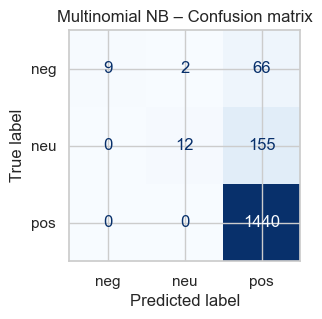

Multinomial NB  —  Accuracy: 0.8676 | Macro-F1: 0.4235 | Train time: 0.01s
              precision    recall  f1-score   support

         neg       1.00      0.12      0.21        77
         neu       0.86      0.07      0.13       167
         pos       0.87      1.00      0.93      1440

    accuracy                           0.87      1684
   macro avg       0.91      0.40      0.42      1684
weighted avg       0.87      0.87      0.82      1684



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


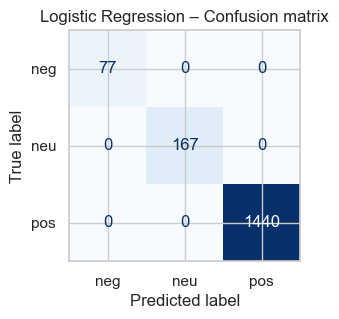

Logistic Regression  —  Accuracy: 1.0000 | Macro-F1: 1.0000 | Train time: 3.04s
              precision    recall  f1-score   support

         neg       1.00      1.00      1.00        77
         neu       1.00      1.00      1.00       167
         pos       1.00      1.00      1.00      1440

    accuracy                           1.00      1684
   macro avg       1.00      1.00      1.00      1684
weighted avg       1.00      1.00      1.00      1684



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


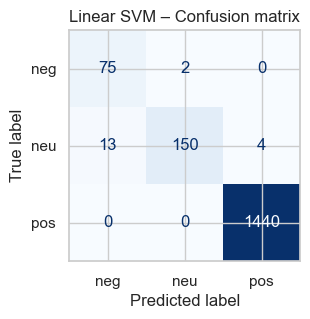

Linear SVM  —  Accuracy: 0.9887 | Macro-F1: 0.9494 | Train time: 0.25s
              precision    recall  f1-score   support

         neg       0.85      0.97      0.91        77
         neu       0.99      0.90      0.94       167
         pos       1.00      1.00      1.00      1440

    accuracy                           0.99      1684
   macro avg       0.95      0.96      0.95      1684
weighted avg       0.99      0.99      0.99      1684



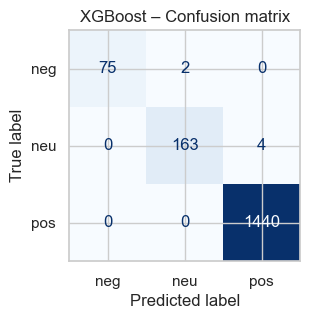

XGBoost  —  Accuracy: 0.9964 | Macro-F1: 0.9891 | Train time: 7.12s
              precision    recall  f1-score   support

         neg       1.00      0.97      0.99        77
         neu       0.99      0.98      0.98       167
         pos       1.00      1.00      1.00      1440

    accuracy                           1.00      1684
   macro avg       1.00      0.98      0.99      1684
weighted avg       1.00      1.00      1.00      1684



In [38]:
results = []

# 1. Multinomial NB
nb = MultinomialNB(alpha=1.0)
results.append(evaluate_model("Multinomial NB", nb, X_train, X_test, y_train, y_test))

# 2. Logistic Regression (saga solver works with sparse + multinomial loss)
lr = LogisticRegression(max_iter=5000, C=4.0, solver="saga", n_jobs=-1, multi_class="multinomial")
results.append(evaluate_model("Logistic Regression", lr, X_train, X_test, y_train, y_test))

# 3. Linear SVM
svm = LinearSVC(C=1.0)
results.append(evaluate_model("Linear SVM", svm, X_train, X_test, y_train, y_test))

# 4. XGBoost  (use sparse matrix directly)
xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=3,
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    random_state=42,
    eval_metric="merror"
)
results.append(evaluate_model("XGBoost", xgb, X_train, X_test, y_train, y_test))


##### phoBERT

In [39]:
from datasets import Dataset
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    TrainingArguments, Trainer
)

MODEL_CHECKPOINT = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_CHECKPOINT)

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

pho_df = df[["clean_review","label"]].rename(
    columns={"clean_review":"text","label":"labels"}
)
train_ds, test_ds = train_test_split(
    pho_df, test_size=0.2, random_state=42, stratify=pho_df["labels"]
)
train_ds = Dataset.from_pandas(train_ds.reset_index(drop=True)).map(tokenize_fn, batched=True)
test_ds  = Dataset.from_pandas(test_ds.reset_index(drop=True)).map(tokenize_fn, batched=True)
train_ds.set_format(type="torch", columns=["input_ids","attention_mask","labels"])
test_ds.set_format(type="torch",  columns=["input_ids","attention_mask","labels"])

model = AutoModelForSequenceClassification.from_pretrained(MODEL_CHECKPOINT, num_labels=3)

training_args = TrainingArguments(
    output_dir="phoBERT-sentiment",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=100,
    seed=42
)


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="macro")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics
)
trainer.train()

# Evaluate on the held-out test set
eval_res = trainer.evaluate()
bert_acc = eval_res["eval_accuracy"]
bert_f1  = eval_res["eval_f1"]

print(f"phoBERT — Accuracy: {bert_acc:.4f} | Macro-F1: {bert_f1:.4f}")
results.append({"model":"phoBERT","accuracy":bert_acc,"f1":bert_f1,"train_sec":None})


Map:   0%|          | 0/6733 [00:00<?, ? examples/s]

Map:   0%|          | 0/1684 [00:00<?, ? examples/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.490900
200,0.391800
300,0.267400
400,0.276500
500,0.231400
600,0.193500
700,0.199300
800,0.196500
900,0.175600
1000,0.151500


phoBERT — Accuracy: 0.9341 | Macro-F1: 0.7910


##### Results summary

In [70]:
res_df = pd.DataFrame(results).sort_values("f1", ascending=False).reset_index(drop=True)
display(res_df)

,model,accuracy,f1,train_sec
0,Logistic Regression,1.000000,1.000000,3.041924
1,XGBoost,0.996437,0.989128,7.117618
2,Linear SVM,0.988717,0.949381,0.247922
3,phoBERT,0.934086,0.791022,NaN
4,Multinomial NB,0.867577,0.423544,0.009115


# 5 · Clustering Analysis <a id="clustering-analysis"></a>

#### Aggregate to company level 

In [71]:
# reload cleaned reviews
df = pd.read_csv("clean_reviews.csv")

# 1) docs per company-id
company_docs = (
    df.groupby("id")["clean_review"]
      .apply(" ".join)
      .rename("doc")
)

# 2) numeric stats per company-id
company_stats = (
    df.groupby("id")
      .agg(
         CompanyName=("Company Name", "first"),   # preserve the name
         review_cnt   =("clean_review","size"),
         pos_word_sum =("positive_word_count","sum"),
         neg_word_sum =("negative_word_count","sum"),
         avg_rating   =("Rating","mean")
      )
)

# stitch it all together, keyed by id
company_df = (
    pd.concat([company_stats, company_docs], axis=1)
      .reset_index()
)

print("company_df before merge:", company_df.shape)

# 5-A.1 ▸ Load Overview sheets and merge on id
ovr_reviews   = pd.read_excel("data/Overview_Reviews.xlsx").rename(columns=str.strip)
ovr_companies = pd.read_excel("data/Overview_Companies.xlsx").rename(columns=str.strip)

print("Overview_Reviews shape:",   ovr_reviews.shape)
print("Overview_Companies shape:", ovr_companies.shape)

# merge
company_df = (
    company_df
      .merge(ovr_reviews,   on="id", how="left", indicator="rev_merge")
      .merge(ovr_companies, on="id", how="left", indicator="comp_merge")
)

print("company_df after merge:", company_df.shape)
display(company_df.head(3))

# 5-A.2 ▸ Sanity checks: which IDs didn’t match?
missing_in_reviews  = company_df.loc[company_df["rev_merge"]  != "both", "id"].unique()
missing_in_companies= company_df.loc[company_df["comp_merge"] != "both", "id"].unique()

print(f"→ {len(missing_in_reviews)} IDs not found in Overview_Reviews.xlsx")
print(f"→ {len(missing_in_companies)} IDs not found in Overview_Companies.xlsx")

# (Optional) list them
print("Missing in Reviews sheet:", missing_in_reviews[:10])
print("Missing in Companies sheet:", missing_in_companies[:10])


company_df before merge: (180, 7)
Overview_Reviews shape: (478, 10)
Overview_Companies shape: (478, 13)
company_df after merge: (180, 30)


,id,CompanyName,review_cnt,pos_word_sum,neg_word_sum,avg_rating,doc,Company Name_x,Number of reviews,Overall rating,...,Company size,Country,Working days,Overtime Policy,Company overview,Our key skills,Why you'll love working here,Location,Href,comp_merge
0,4,Accenture,18,63,6,3.666667,môi_trường thoải_mái áp_lực làm_việc hybrid lư...,Accenture,18.0,3.7,...,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n,both
1,5,Adnovum Vietnam,6,32,7,4.500000,tuyệt địa_điểm công_việc cấp_độ tiếng adnovum ...,Adnovum Vietnam,6.0,4.5,...,51-150 employees,Switzerland,Monday - Friday,No OT,Adnovum\nWe are the sharp-minded IT experts wh...,J2EE\nJava\nSpring\nJavaScript\nEnglish\n.NET,Competitive salary + compensation package\nFle...,"{'Ho Chi Minh': ['Etown 2 Building, 364 Cong H...",https://itviec.com/companies/adnovum-vietnam\n,both
2,6,Ahamove,12,50,9,3.833333,môi_trường làm_việc năng_động chính_sách wfh m...,Ahamove,12.0,3.8,...,301-500 employees,Vietnam,Monday - Friday,No OT,Ahamove is positioned as Vietnam’s leading int...,Python\nVueJS\nNodeJS\nAngular,Disruptive innovations\nPeople-oriented philos...,{'Ho Chi Minh': ['Tòa nhà Rivera Park 7/28 Thà...,https://itviec.com/companies/ahamove\n,both


→ 0 IDs not found in Overview_Reviews.xlsx
→ 0 IDs not found in Overview_Companies.xlsx
Missing in Reviews sheet: []
Missing in Companies sheet: []


#### Build the company-level feature matrix

In [72]:
from sklearn.preprocessing import StandardScaler
# ▶ Text features: TF-IDF on the aggregated “doc” column
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    max_features=30_000,
    min_df=3,
    sublinear_tf=True
)
X_text = tfidf.fit_transform(company_df["doc"])

# ▶ Dense sentiment statistics (scaled)
dense_cols = ["review_cnt","pos_word_sum","neg_word_sum","avg_rating"]
dense_vals = company_df[dense_cols].values
scaler      = StandardScaler()
dense_scaled = scaler.fit_transform(dense_vals)
dense_sparse = csr_matrix(dense_scaled)

# ▶ Final feature matrix: TF-IDF + sentiment stats (+ any extras)
X = hstack([X_text, dense_sparse], format="csr")
print("→ Feature matrix shape:", X.shape)


→ Feature matrix shape: (180, 15346)


#### Fit & evaluate four clustering algorithms


In [73]:
# Store silhouette scores & attach labels to company_df
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

cluster_summary = []

def run_cluster(name, estimator, data, to_dense=False):
    arr = data.toarray() if to_dense else data
    labels = estimator.fit_predict(arr)
    mask   = labels != -1
    sil = silhouette_score(arr[mask], labels[mask]) if len(set(labels[mask]))>1 else np.nan
    company_df[f"cluster_{name}"] = labels
    cluster_summary.append({"algo":name, "silhouette":sil})
    print(f"{name}: clusters={np.unique(labels)} | silhouette={sil:.3f}")

# 1. K-Means (k=6)
run_cluster("kmeans",
    KMeans(n_clusters=6, n_init=20, random_state=42),
    X
)

# 2. MiniBatch K-Means
run_cluster("mbkmeans",
    MiniBatchKMeans(n_clusters=6, batch_size=256, n_init=10, random_state=42),
    X
)

# 3. Agglomerative (Ward linkage)  → requires dense input
run_cluster("agglo",
    AgglomerativeClustering(n_clusters=6, linkage="ward"),
    X, to_dense=True
)

# 4. DBSCAN  → eps/min_samples may need tuning
run_cluster("dbscan",
    DBSCAN(eps=0.8, min_samples=3, n_jobs=-1),
    X
)

pd.DataFrame(cluster_summary)


kmeans: clusters=[0 1 2 3 4 5] | silhouette=0.166
mbkmeans: clusters=[0 1 2 3 4 5] | silhouette=0.102
agglo: clusters=[0 1 2 3 4 5] | silhouette=0.164
dbscan: clusters=[-1] | silhouette=nan


,algo,silhouette
0,kmeans,0.165947
1,mbkmeans,0.101773
2,agglo,0.164295
3,dbscan,NaN


#### Interpret & Describe Clusters

,algo,silhouette
0,kmeans,0.165947
2,agglo,0.164295
1,mbkmeans,0.101773
3,dbscan,NaN


/var/folders/z_/mk8t2fm92d90h0ztgpn0vbxm0000gn/T/ipykernel_49091/3270304504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="algo", y="silhouette", data=summary, palette="muted")


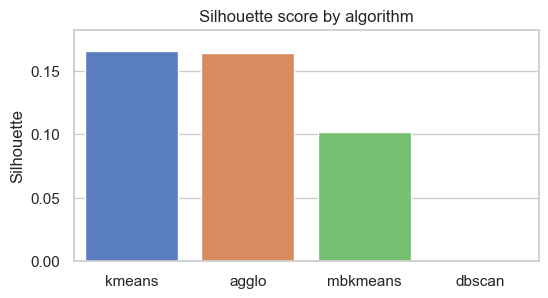

In [74]:
sns.set(style="whitegrid")

summary = pd.DataFrame(cluster_summary).sort_values("silhouette", ascending=False)
display(summary)

# barplot of silhouette
plt.figure(figsize=(6,3))
sns.barplot(x="algo", y="silhouette", data=summary, palette="muted")
plt.title("Silhouette score by algorithm")
plt.ylabel("Silhouette"); plt.xlabel("")
plt.ylim(0, summary.silhouette.max() * 1.1)
plt.show()

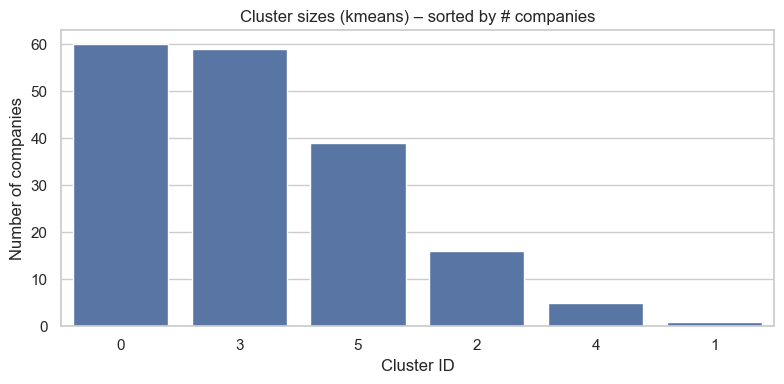

In [75]:
# Prepare a sorted DataFrame of cluster sizes
sizes = company_df["cluster_kmeans"].value_counts().sort_values(ascending=False)
df_sizes = sizes.rename_axis("cluster").reset_index(name="company_count")

plt.figure(figsize=(8,4))
sns.barplot(
    data=df_sizes,
    x="cluster",
    y="company_count",
    order=df_sizes["cluster"],      
    color="C0" 
)
plt.title("Cluster sizes (kmeans) – sorted by # companies")
plt.xlabel("Cluster ID")
plt.ylabel("Number of companies")
plt.tight_layout()
plt.show()


#### Top terms per cluster (text only, from TF-IDF)

In [76]:
# Re-fit a pure TF-IDF KMeans to access cluster_centers_
kmeans_text = KMeans(n_clusters=6, n_init=20, random_state=42)
kmeans_text.fit(X_text)

feature_names = tfidf.get_feature_names_out()
n_top = 10

cluster_terms = {}
for i, center in enumerate(kmeans_text.cluster_centers_):
    top_idxs = center.argsort()[::-1][:n_top]
    terms = feature_names[top_idxs]
    cluster_terms[i] = terms.tolist()

# Display
for cluster_id, terms in cluster_terms.items():
    print(f"Cluster {cluster_id} top terms:", ", ".join(terms))


Cluster 0 top terms: nhật, tiếng nhật, tốt, không, môi_trường, làm_việc, thích tốt, công_ty nhật, công_ty, thân_thiện
Cluster 1 top terms: không, công_ty, làm_việc, tốt, môi_trường, lương, sếp, văn_phòng, thoải_mái, công_việc
Cluster 2 top terms: 00, 00 17, 17 00, 17, cắm trại, trại, công_ty, môi_trường, làm_việc, cắm
Cluster 3 top terms: làm_việc, công_ty, môi_trường, không, môi_trường làm_việc, tốt, trẻ, thoải_mái, mong_muốn, sếp
Cluster 4 top terms: không, công_ty, tốt, công_việc, tuyệt, environment, overtime, công_việc đời_sống, flexible, đời_sống
Cluster 5 top terms: không, công_ty, làm_việc, tốt, môi_trường, lương, dự_án, thân_thiện, công_việc, đồng_nghiệp
